In [1]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\michaelhsieh\AppData\Local\conda\conda\envs\DeepLearning\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('autos.csv', encoding='Latin1', parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'])

In [3]:
condition=(df.price>10)&(df.price!=12345678)&(df.price<2147483647)
df[condition].shape

(359400, 20)

In [4]:
df.shape

(371528, 20)

In [5]:
df[condition][['price', 'brand', 'model', 'yearOfRegistration']].sort_values(by='price').head()

,price,brand,model,yearOfRegistration
128160,11,ford,escort,2000
108706,11,hyundai,i_reihe,2015
52696,11,sonstige_autos,NaN,2005
124098,11,sonstige_autos,NaN,1995
306468,11,audi,a4,1997


In [6]:
df[condition][['price', 'brand', 'model', 'yearOfRegistration']].dropna().shape

(341393, 4)

In [7]:
df[condition][['price', 'brand', 'model', 'yearOfRegistration']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 371527
Data columns (total 4 columns):
price                 359400 non-null int64
brand                 359400 non-null object
model                 341393 non-null object
yearOfRegistration    359400 non-null int64
dtypes: int64(2), object(2)
memory usage: 13.7+ MB


In [8]:
df_sub=df[condition][['price', 'brand', 'model', 'yearOfRegistration']].copy()
df_sub['model'].fillna(value='nan', inplace=True)

In [9]:
df_sub.sort_values(by='price').head(5)

,price,brand,model,yearOfRegistration
128160,11,ford,escort,2000
108706,11,hyundai,i_reihe,2015
52696,11,sonstige_autos,nan,2005
124098,11,sonstige_autos,nan,1995
306468,11,audi,a4,1997


In [46]:
df_sub['auto_summary']=df_sub['brand']+' '+df_sub['model']+' '+df_sub['yearOfRegistration'].astype(str)

In [47]:
df_sub['log_price']=df_sub['price'].apply(np.log2)

In [48]:
df_sub.head()

,price,brand,model,yearOfRegistration,auto_summary,log_price
0,480,volkswagen,golf,1993,volkswagen golf 1993,8.906891
1,18300,audi,nan,2011,audi nan 2011,14.159556
2,9800,jeep,grand,2004,jeep grand 2004,13.258566
3,1500,volkswagen,golf,2001,volkswagen golf 2001,10.550747
4,3600,skoda,fabia,2008,skoda fabia 2008,11.813781


In [13]:
for i in ['brand', 'model', 'yearOfRegistration']:
    print(df_sub[i].unique().shape)

(40,)
(252,)
(144,)


In [14]:
df_sub.auto_summary.unique().shape

(8186,)

reference: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
```python
# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))
```

In [49]:
vocab_size = 450
max_length=3
encoded_docs = [one_hot(d, vocab_size, filters='!"#$%&()*+,./:;<=>?@[\]^`{|}~') for d in df_sub.auto_summary]

In [50]:
encoded_docs[0]

[426, 357, 63]

In [51]:
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [52]:
padded_docs.shape

(359400, 3)

In [53]:
padded_docs[0:10]

array([[426, 357,  63],
       [435,  22, 243],
       [168, 428, 125],
       [426, 357, 250],
       [239, 173, 410],
       [332, 306, 137],
       [235,  56, 125],
       [387, 118, 371],
       [426, 357,  47],
       [150,  18, 125]])

In [54]:
for d in df_sub.auto_summary[:10]:
    print(d)

volkswagen golf 1993
audi nan 2011
jeep grand 2004
volkswagen golf 2001
skoda fabia 2008
bmw 3er 1995
peugeot 2_reihe 2004
ford c_max 2014
volkswagen golf 1998
mazda 3_reihe 2004


Regression with Keras (ref: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/)

In [55]:
vector_size=100
model = Sequential()
model.add(Embedding(vocab_size, vector_size, input_length=max_length))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# summarize the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 3, 100)            45000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                3010      
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 48,021
Trainable params: 48,021
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
model.fit(padded_docs, df_sub['log_price'].values, batch_size=128, epochs=15, verbose=1)
# evaluate the model
loss = model.evaluate(padded_docs, df_sub['log_price'].values, verbose=1)

Epoch 1/15
359400/359400 [==============================] - 8s 22us/step - loss: 8.8422
Epoch 2/15
359400/359400 [==============================] - 8s 21us/step - loss: 4.9934
Epoch 3/15
359400/359400 [==============================] - 8s 22us/step - loss: 3.5201
Epoch 4/15
359400/359400 [==============================] - 8s 22us/step - loss: 2.3475
Epoch 5/15
359400/359400 [==============================] - 8s 22us/step - loss: 1.6113
Epoch 6/15
359400/359400 [==============================] - 8s 21us/step - loss: 1.2306
Epoch 7/15
359400/359400 [==============================] - 8s 21us/step - loss: 1.0968
Epoch 8/15
359400/359400 [==============================] - 8s 21us/step - loss: 1.0637
Epoch 9/15
359400/359400 [==============================] - 8s 22us/step - loss: 1.0552
Epoch 10/15
359400/359400 [==============================] - 8s 21us/step - loss: 1.0497
Epoch 11/15
359400/359400 [==============================] - 8s 22us/step - loss: 1.0422
Epoch 12/15
359400/359400 [===

In [57]:
loss

0.9079726202088592

In [58]:
emb_layer=model.layers[0]

In [59]:
emb_layer.get_weights()[0].shape

(450, 100)

In [60]:
emb_layer.get_weights()[0][0]

array([ 0.00750045,  0.01512431,  0.00176346, -0.00816358,  0.0417742 ,
        0.03024692,  0.02125682,  0.04218357, -0.04187945,  0.04398079,
       -0.02553274, -0.01705325, -0.01612756,  0.0141019 ,  0.02500857,
       -0.01592666, -0.00509534, -0.04201967, -0.04309152, -0.00437183,
       -0.01314082,  0.01009002,  0.03633268,  0.00156967,  0.04936292,
        0.02976843, -0.02588004,  0.01858689, -0.00276369, -0.01981856,
        0.00106769,  0.00072317, -0.03175092, -0.03523252,  0.01967465,
       -0.03135607,  0.00908231, -0.04428884, -0.04629911, -0.01715754,
        0.03872713,  0.04380004, -0.01591764, -0.01151586, -0.02078294,
       -0.02471521,  0.03468596, -0.02686406, -0.0369907 , -0.0096401 ,
       -0.02481862,  0.00635648,  0.00479283, -0.01691762, -0.00392096,
       -0.03430712,  0.0162652 ,  0.00221605, -0.04398265,  0.01760236,
        0.00649593,  0.0274086 ,  0.00880487, -0.02549515, -0.00959283,
       -0.00154624, -0.02941544,  0.03314671,  0.01766362,  0.04

In [61]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
low_dim_embs = tsne.fit_transform(emb_layer.get_weights()[0][:500,:])

In [62]:
length=[len(i) for i in encoded_docs]
np.array(length).max()

3

In [63]:
encoded_docs[0], len(encoded_docs)

([426, 357, 63], 359400)

In [65]:
word_dict={}
for i in range(len(encoded_docs)):
    for j in range(len(encoded_docs[i])):
        if encoded_docs[i][j] in word_dict:
            #print(i, j, word_dict[encoded_docs[i][j]])
            continue
        else:
            #print(encoded_docs[i][j], df_sub.auto_summary.tolist()[i].split(' ')[j])
            word_dict[encoded_docs[i][j]]=df_sub.auto_summary.tolist()[i].split(' ')[j]
aa=word_dict.keys()
word_keys=sorted(list(aa))

In [66]:
word_dict

{2: 'caddy',
 4: 'fiesta',
 8: '2012',
 12: 'trabant',
 13: '1000',
 14: '1984',
 15: 'i_reihe',
 16: '1951',
 17: '3800',
 18: '3_reihe',
 20: 'clk',
 21: 'tigra',
 22: 'nan',
 23: '1940',
 25: 'porsche',
 26: 'lancia',
 27: 'sorento',
 32: '2005',
 33: 'honda',
 35: '1_reihe',
 37: '1983',
 39: '300c',
 41: '2007',
 44: 'alfa_romeo',
 45: '2002',
 46: '5_reihe',
 47: '1998',
 49: '850',
 51: 'mercedes_benz',
 52: 'v70',
 53: 'chevrolet',
 55: 'combo',
 56: '2_reihe',
 57: 'vectra',
 60: 'getz',
 61: 'up',
 63: '1993',
 64: 'transporter',
 65: 'espace',
 66: '1978',
 68: 'q5',
 70: 'scirocco',
 71: 'fiat',
 73: 'colt',
 74: '1954',
 75: '1989',
 79: 'b_klasse',
 84: 'accord',
 85: 'almera',
 87: 'lodgy',
 92: 'volvo',
 98: 'swift',
 99: '1960',
 100: 'verso',
 102: 'logan',
 104: '1971',
 107: 'citigo',
 108: 'fortwo',
 111: '1976',
 112: '1800',
 113: 'forester',
 114: 'primera',
 116: '1001',
 118: 'c_max',
 120: 'v40',
 121: 'cooper',
 122: 'm_klasse',
 123: 'hyundai',
 124: 'opel'

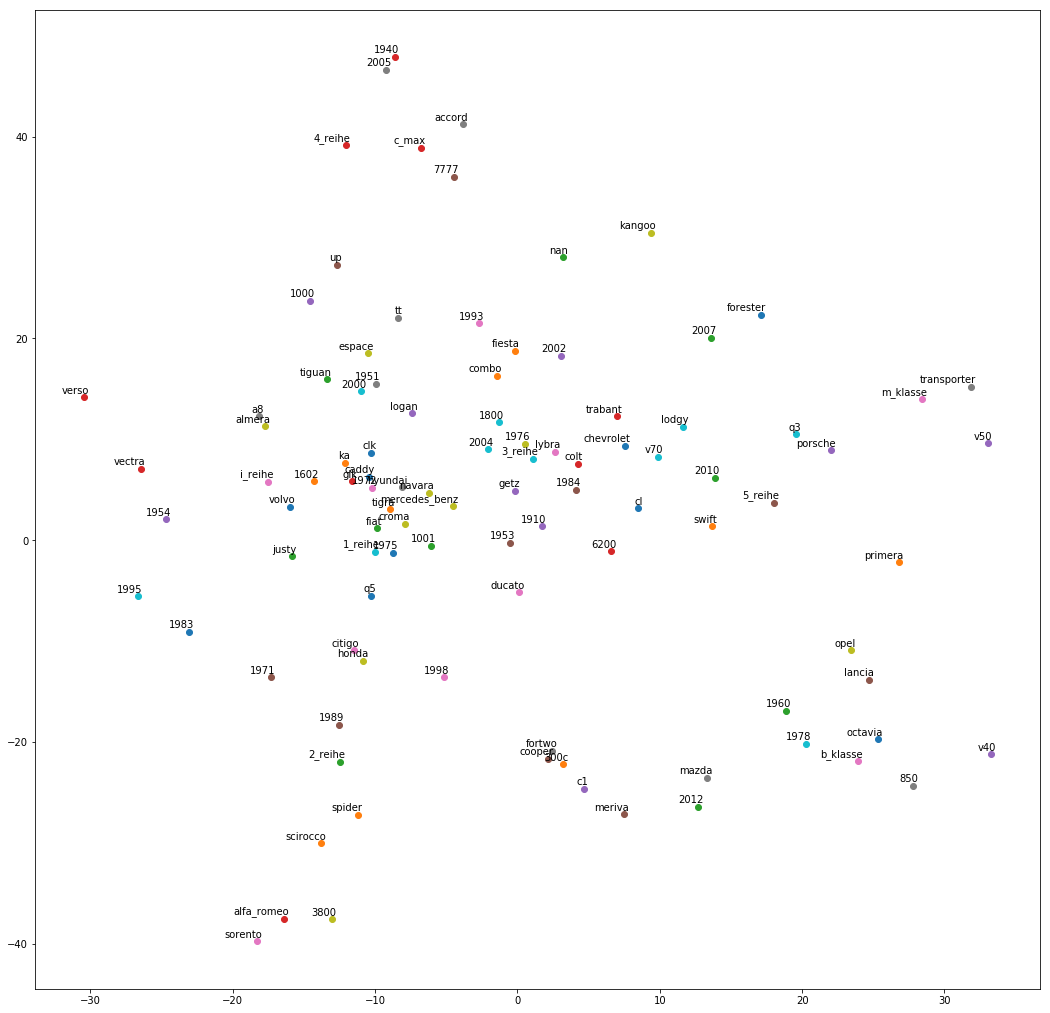

In [68]:
plt.figure(figsize=(18, 18))
for i, key in enumerate(word_keys[:100]):
    x, y = low_dim_embs[i, :]
    plt.scatter(x, y)
    plt.annotate(
        word_dict[key],
        xy=(x, y),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom')